In [1]:
#Locate the data, prepare for import of the MPT file
#Import necessary packaging
from utils.tools import *
from os import listdir
from os.path import isfile, join
from utils.tools import *
import statistics as stat
path=r"C:\Users\cjang\Desktop\Kyler_Speed_Circuit\data\\"
path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']
path_files

['DE_40_10_60.mpt',
 'DE_40_11_60.mpt',
 'DE_40_12_60.mpt',
 'DE_40_13_60.mpt',
 'DE_40_14_60.mpt',
 'DE_40_15_60.mpt',
 'DE_40_1_30.mpt',
 'DE_40_2_60.mpt',
 'DE_40_3_60.mpt',
 'DE_40_4_60.mpt',
 'DE_40_5_60.mpt',
 'DE_40_6_60.mpt',
 'DE_40_7_60.mpt',
 'DE_40_8_60.mpt',
 'DE_40_9_60.mpt',
 'DE_49_1_30.mpt',
 'DE_49_2_30.mpt',
 'DE_49_3_30.mpt',
 'DE_49_4_30.mpt',
 'DE_49_5_30.mpt',
 'DE_49_6_30.mpt',
 'DE_49_7_30.mpt',
 'DE_49_8_30.mpt',
 'DE_49_9_30.mpt',
 'DE_57_6_60.mpt']

No handles with labels found to put in legend.


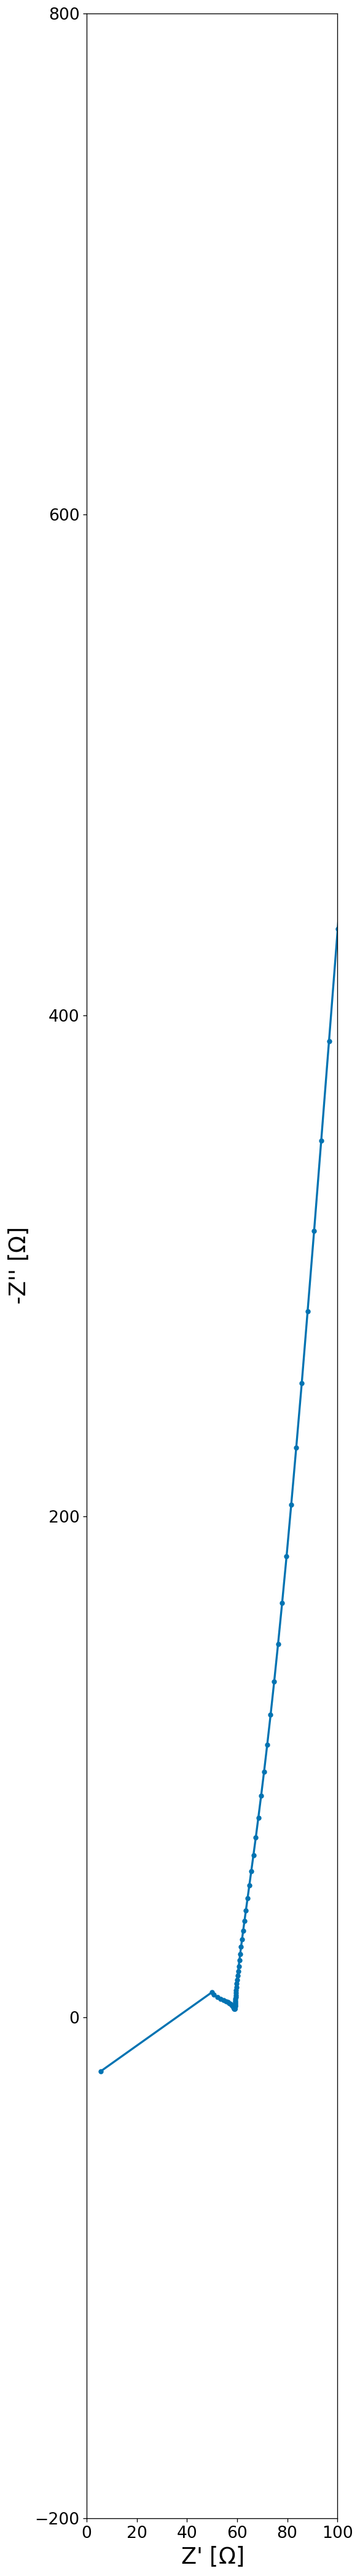

In [2]:
ex_mpt = mpt_data(path,['DE_40_7_60.mpt'])
ex_mpt.set_new_gph_dims(20,100)
ex_mpt.mpt_plot(x_window = [0, 100], y_window = [-200,800])

In [4]:
mask_list = [ex_mpt.fast_mask(), ex_mpt.masker(), ex_mpt.masker0()]
mask_list

[[1000018.6, 1778.2927], [891246.69, 281.89429], [1000018.6, 141.31134]]

In [7]:
masked_mpt = mpt_data(path, ['DE_40_7_60.mpt'], mask =mask_list[1])

No handles with labels found to put in legend.


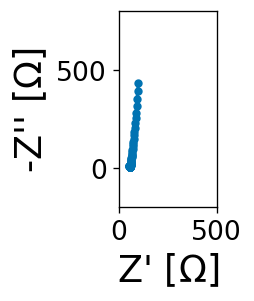

In [8]:
masked_mpt.mpt_plot(x_window = [0, 500], y_window = [-200,800])

In [9]:
masked_mpt.guesser(path)

42.05290263 901283.319555   898343.66104287 896017.42961098
 893931.66187061 892120.08015335 890699.796744   889493.6537867
 888546.08803236 887828.6798617  887214.30356374 886770.42504685
 886440.35227498 886167.64488983 885955.21067845 885807.79235684
 885692.19638794 885599.7798508  885534.36724632 885469.22903916
 885406.01783057 885348.42343874 885313.74047063 885279.5667677
 885259.95016157 885229.0340881  885198.10879993 885171.47698346
 885130.57427884 885067.00789719 885015.03460775 884936.62418804
 884853.85779292 884745.48070377 884627.05868684 884477.37897296
 884316.9270557  884108.02872332 883871.69590577 883611.02533683
 883295.8543179  882943.04314513 882539.71631355 882091.80018306
 881588.99355337 881038.82974188 880430.34971077 879763.5946521
 879045.42990386 878277.91319137 877484.51544505 876675.43156829
 875863.18891318 875094.5011173  874407.93151163 873836.12750625
 873461.88445588 873364.43011491 873617.96929072 874353.49713968
 875726.40252582 877913.6058208  

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()